**FastAI book chapter 5, Pet Breeds**
Image classification, attempting to get it to run on my GTX 1080Ti
Based off of this copy of the book: https://github.com/flyinacres/fastbook/blob/master/05_pet_breeds.ipynb

Need to install fastai.  Probably could add this to the conda environment if I find that I need to do this often

In [1]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

In [2]:
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

Check to ensure that my GPU is visible and selectable

In [3]:
# Test to ensure that my cuda is still visible
import torch as torch
torch.cuda.is_available()

True

In [4]:
torch.cuda.set_device(0)
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1080 Ti'

Now set up the fastbook itself

In [6]:
# installing/upgrading fastai2 
!pip install --upgrade fastbook

     ---------------------------------------- 0.0/130.7 kB ? eta -:--:--
     ------------------------ -------------- 81.9/130.7 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 130.7/130.7 kB 1.9 MB/s eta 0:00:00
  Using cached aiohttp-3.9.3-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     -------------------------------------- 42.0/42.0 kB 675.2 kB/s eta 0:00:00
  Using cached frozenlist-1.4.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp311-cp311-win_amd64.whl.metadata (4.3 kB)
  Using cached yarl-1.9.4-cp311-cp311-win_amd64.whl.metadata (32 kB)
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
    --------------------------------------- 10.2/719.8 kB ? eta -:--:--
   --- ----------------------------------- 61.4/719.8 kB 825.8 kB/s eta 0:00:01
   ---- -------------------

In [7]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [8]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [ ]:
Now get the specific resources for this project
All of this data is likely crowding up my drive--will need to remember to erase it at some point

In [9]:
path = untar_data(URLs.PETS)

In [10]:
#hide
Path.BASE_PATH = path
path.ls()

(#2) [Path('annotations'),Path('images')]

In [11]:
(path/"images").ls()

(#7393) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_100.mat'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_101.mat'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_102.mat'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg')...]

In [12]:
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)


['Abyssinian']

In [13]:

pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

Original code used a different image set (bear recognition).  Modified this to work with current images.

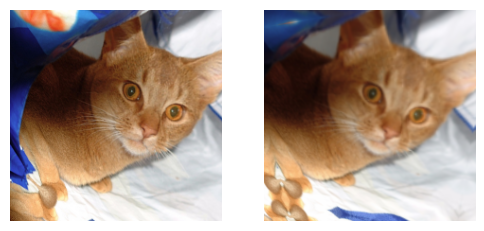

In [16]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(path/'images'/'Abyssinian_100.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);
     

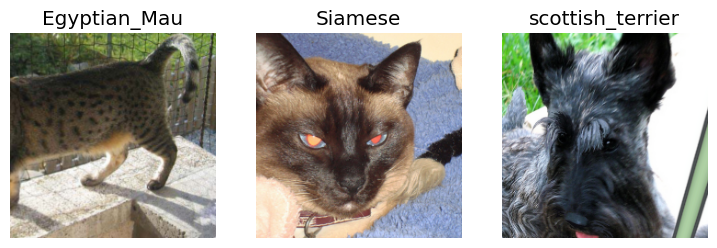

In [17]:
dls.show_batch(nrows=1, ncols=3)

In [19]:
#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")
     

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\ron-w\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\ron-w\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 375, 500])
	Item at index 1 has shape: torch.Size([3, 199, 300])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

Note the times here.  In the fastbook example I saved:  
https://github.com/flyinacres/fastbook/blob/master/05_pet_breeds.ipynb
these were taking somewhere around 20 seconds each, using online GPUs. 
I should rerun this online with Kaggle to see if my numbers get close to the published version--
I believe that their examples use better GPUS...

In [20]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\ron-w/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 77.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.510539,0.339320,0.101489,01:36


epoch,train_loss,valid_loss,error_rate,time
0,0.509686,0.325512,0.107578,01:12
1,0.328624,0.215640,0.062923,01:11


In [21]:
x,y = dls.one_batch()

In [22]:
y

TensorCategory([14,  3, 18, 34, 36, 22,  9,  2,  8, 11, 23,  2, 23, 22,  8,  6, 15, 26, 35, 16,  9, 30, 13, 11, 14,  1, 18, 17, 23,  6, 28, 24, 17, 29, 31,  5, 26,  6, 36,  2, 25, 25, 11, 16,  5, 29,
                35, 20, 32, 12, 36,  8, 36,  0,  6, 15, 30, 27, 19,  9,  4, 32, 23,  4], device='cuda:0')

In [23]:

preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.3062e-06, 1.4085e-06, 5.0747e-06, 6.7784e-08, 1.0535e-07, 1.1630e-06, 3.1075e-07, 2.7419e-06, 2.3025e-06, 6.7141e-08, 4.0452e-07, 2.0721e-09, 4.3665e-07, 7.0033e-06, 9.9862e-01, 1.2779e-03,
        6.8991e-06, 2.9820e-08, 1.5269e-05, 8.7998e-07, 1.8866e-06, 5.2297e-07, 7.8626e-07, 7.7233e-07, 5.2453e-07, 1.6492e-06, 6.6002e-06, 3.1169e-06, 1.9964e-06, 1.2788e-07, 2.0936e-05, 1.3751e-06,
        3.8042e-06, 7.8754e-06, 3.3788e-06, 4.7720e-07, 8.8506e-07])

In [24]:

len(preds[0]),preds[0].sum()

(37, tensor(1.0000))

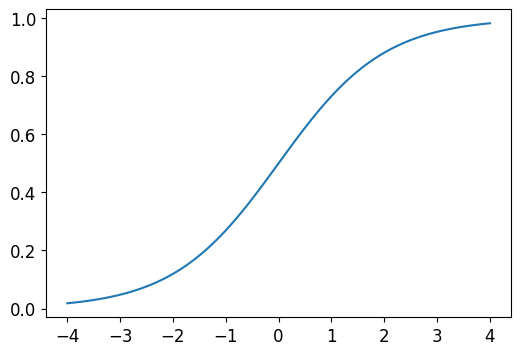

In [25]:
plot_function(torch.sigmoid, min=-4,max=4)

In [26]:
#hide
torch.random.manual_seed(42);

In [27]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [28]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [29]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [30]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [31]:
targ = tensor([0,1,0,1,1,0])


In [32]:
idx = range(6)
sm_acts[idx, targ]


tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [33]:

#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('')[1]
html = re.sub(r'', r'', html)
display(HTML(html))

AttributeError: 'Styler' object has no attribute 'hide_index'

In [34]:
-sm_acts[idx, targ]


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [35]:
F.nll_loss(sm_acts, targ, reduction='none')


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

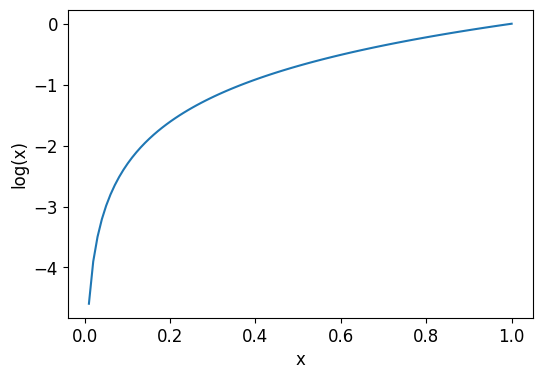

In [36]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')
